# Sashank Dulal
# NP03A190314

In [1]:
# Importing all necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
housing=pd.read_csv('housing.csv') #Loading california housing price dataset
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [3]:
median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median, inplace=True)

 #### since the total bedrooms attribute of dataframe has some null values, trying to fill them with the median value. The value of median is saved in case of future need.

In [4]:
ocean_prox=housing["ocean_proximity"].astype("category").cat.codes
housing=housing.drop(["ocean_proximity"],axis=1)
housing["ocean_proximity"]=ocean_prox
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3


#### The ocean_proximity column consists of string values which we cannot use for calculation so it is converted to numerical category based on their corresponding string categories.

In [5]:
housing.corr()["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
ocean_proximity       0.081750
households            0.065843
total_bedrooms        0.049457
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

#### Correlation is used to find out the linear dependency between median_house_value and all the other variables. It ranges between 0 and 1 and higher the correlation with dependent variable, the better it can predict the the dependent variable. In our context, median_income, total_rooma, housing_median_age and ocean_proximity are some of major

In [6]:
x=pd.DataFrame(housing[["median_income","total_rooms","housing_median_age","households","ocean_proximity"]])
x.insert(len(x.columns),"0",np.array([1]*len(housing)))
y=housing["median_house_value"]

In [7]:
def normalize(col):
    return (col-col.min())/(col.max()-col.min())
#Normalizing every column in the dataset
for column in housing.columns:
    x[column]=normalize(housing[column]) 
normalize(y)

0        0.902266
1        0.708247
2        0.695051
3        0.672783
4        0.674638
           ...   
20635    0.130105
20636    0.128043
20637    0.159383
20638    0.143713
20639    0.153403
Name: median_house_value, Length: 20640, dtype: float64

In [8]:
theta=np.array([0]*len(x.columns))

In [9]:
#hypothesis (h(x)=theta*x)
def hypothesis(theta,x):
    return theta*x

In [10]:
#cost function of the algorithm
m=len(x)
def costFn(x,y,theta):
    y1=hypothesis(theta,x)
    y1=np.sum(y1,axis=1)
    return sum(np.sqrt((y1-y)**2)/(2*m))

In [11]:
def gradientDescent(x,y,theta,alpha,i):
    theta=np.array([0]*len(x.columns))
    J=[]                               
    k=0                                
    while k<i:
        y1=hypothesis(theta,x)
        y1=np.sum(y1,axis=1)
        for c in range(0,len(x.columns)):
            theta[c]=theta[c]-alpha*(sum((y1-y)*x.iloc[:,c])/len(x))
        j=costFn(x,y,theta)
        J.append(j)
        k+=1
    return J,theta

#### The code below represents the algorithm for implementing gradient descent. It is a repetitive process in which theta is changed with each iteration in order to get to the optimal value of theta and hence be able to closely predict the dependent variable (car price in this case) given the other independent variables in the dataset.

#### The expression for calculating theta is:
#### $ \theta_{c}=\theta_{c}-\alpha/m(\sum\limits_{j=1}^{m} ( ( \hat y_{j}  - y_{j})*X[j][c] ) $
#### Where c is the $n^{th}$ column and j is the row index 


In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [13]:
J,theta=gradientDescent(x,y,theta,0.6,1000)

In [14]:
J2,theta2=gradientDescent(x_train,y_train,theta,0.00006,1000)

In [15]:
J3,theta3=gradientDescent(x_train,y_train,theta,0.009,1000)

#### we are calling gradient descent on our dataset along with three different  learning rates of and the optimization is to be done in 1000 iterations. Gradient descent is called three times only for comparison purposes. In normal cases, we would call gradient descent only once.

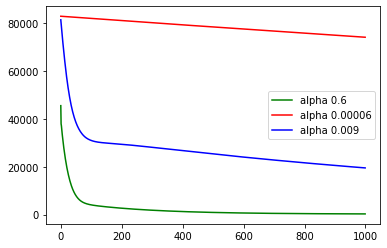

In [17]:
%matplotlib inline
plt.figure()
plt.plot(list(range(0,len(J))),J,color="green")
plt.plot(list(range(0,len(J2))),J2,color="red")
plt.plot(list(range(0,len(J3))),J3,color="blue")
plt.legend(('alpha 0.6','alpha 0.00006','alpha 0.009'))
plt.show()

#### As you can see from the figure above, the alpha value determines the rate of descent of our algorithm. The rate of descent for gradient descent with an alpha of 0.00006 is very slow and thereby it requires more iterations to get to 0. In the case of alpha 0.009, the rate of descent is good but the starting cost is high so it also requires higher number of iterations. Finally, with the learning rate of 0.6, our algorithm gets near to 0 cost in about 1000 iterations. So we can deduce that for any well performing gradient descent implementation, the relation between learning rate and number of iterations is paramount.

In [18]:
y_hat=hypothesis(theta,x_train)
y_hat=np.sum(y_hat,axis=1)
y_hat_test=hypothesis(theta,x_test)
y_hat_test=np.sum(y_hat_test,axis=1)

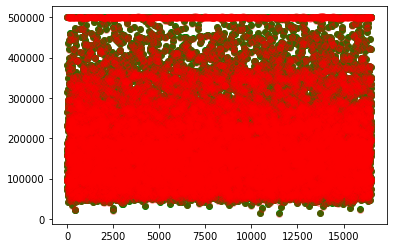

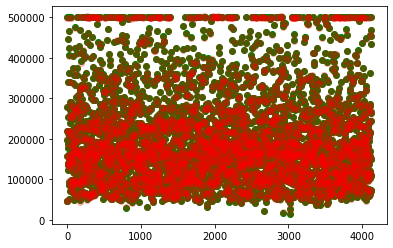

In [19]:
#Red color shows the predicted value and green color shows the absolute value
%matplotlib inline
plt.figure()
plt.scatter(x=list(range(0,len(x_train))),y=y_train,color="green")
plt.scatter(x=list(range(0,len(x_train))),y=y_hat,color="red", alpha=0.25)
plt.figure()
plt.scatter(x=list(range(0,len(x_test))),y=y_test,color="green")
plt.scatter(x=list(range(0,len(x_test))),y=y_hat_test,color="red", alpha=0.25)
plt.show()


#### The figure above depicts the actual values in our datsed with green color and the predicted values with red color. As we can see that our dataset is heavily distributed within various ranges, we will later find out how it affects the overall accuracy and the errors.

In [20]:
from sklearn.metrics import mean_squared_error as mserr
mse=mserr(y_train,y_hat)

In [21]:
mse

540041.3486013375

#### As our dataset has heavy distribution, the mean squared error is high which means that our best fit line is not better at predicting accurately.

In [47]:
def err_calculate(prediction,absolute):
    absolute=np.array(absolute)
    maerr=0;
    total=0;
    for index,item in enumerate(absolute):
#         print(prediction[index])
        total+=abs((item-prediction[index])**2)
    maerr=total/len(prediction)
    return maerr
predicted=np.array(y_hat)
mean_err=err_calculate(predicted,y_train)

In [48]:

mean_err

540041.3486013402